In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BASE_COLORS
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn import metrics

plt.style.use('seaborn')

# Loading data

In [123]:
data = pd.read_csv("./data.dat", sep=';')
X = data.to_numpy()
display(data)
print(X)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
333,3,3,3,3,3,3,5,5,3,3,3
334,3,3,3,3,3,3,5,5,3,3,3
335,3,3,3,3,3,3,5,5,3,3,3
336,3,3,3,3,3,3,5,5,3,3,3


[[4 5 5 ... 3 3 3]
 [5 4 5 ... 3 3 3]
 [5 5 4 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]


# Analyzing data

## dendrogram

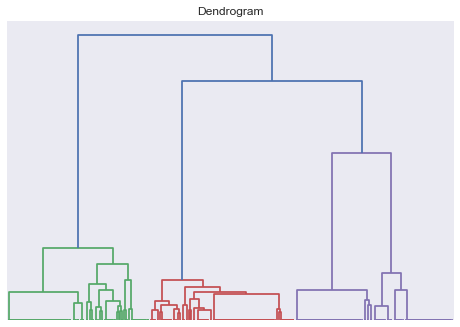

In [124]:
dendrogram_ = sch.dendrogram(sch.linkage(data, method='ward'))
plt.title('Dendrogram')
plt.xticks([])
plt.yticks([])
plt.show()

## lower-dimensional space

In [125]:
X_embedded = TSNE(n_components=2, init='random').fit_transform(X)
print(X_embedded.shape)

(338, 2)


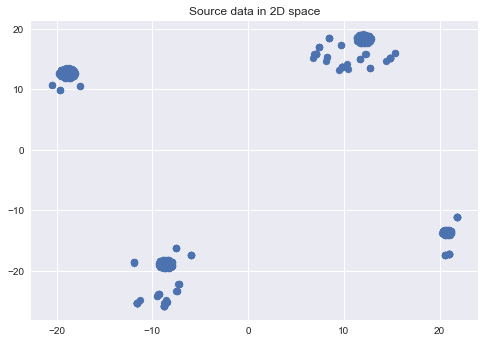

In [126]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.title('Source data in 2D space')
plt.show()

## normalize data

In [261]:
scaler = preprocessing.StandardScaler().fit(X)

In [262]:
X_scaled = scaler.transform(X)

# Clustering data

In [285]:
labels = DBSCAN(eps=2, min_samples=6).fit_predict(X_scaled)
colors = [list(BASE_COLORS.keys())[i] for i in labels]

In [286]:
metrics.silhouette_score(X_scaled, labels)

0.6948866720642106

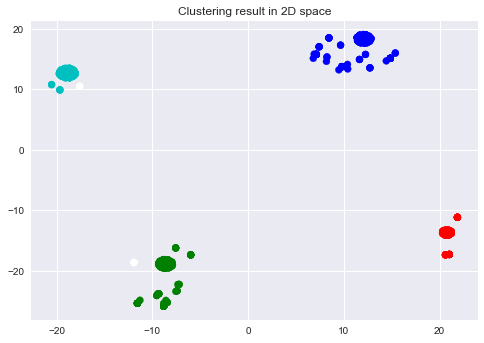

In [287]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=colors)
plt.title('Clustering result in 2D space')
plt.show()

# Interpreting results

Полученные результаты показывают явное разделение опрашиваемых на **5 групп**: 
- **Группа -1:** *Кластер с выбросами*
- **Группа 0:** *Потребляют леденцы для свежести полости рта*
- **Группа 1:** *Потребляют леденцы для улучшения самочувствия*
- **Группа 2:** *Потребляют леденцы как сладости*
- **Группа 3:** *Потребляют леденцы для концентрации внимания* 

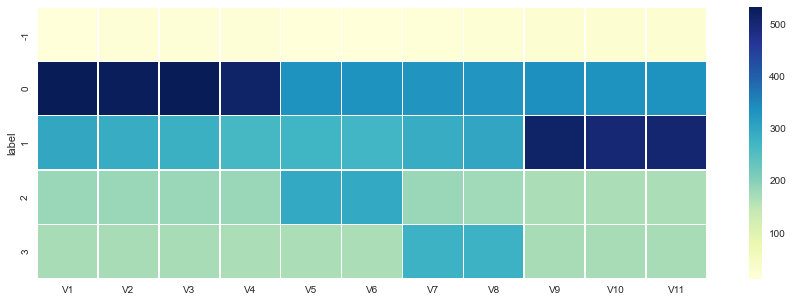

In [288]:
data["label"] = labels

plt.figure(figsize=(15, 5))
sns.heatmap(data.groupby("label").sum(), linewidths=.5, cmap="YlGnBu")
plt.show()

In [289]:
N_EXAMPLES = 3

for label in set(labels):
    indexes = np.random.choice(np.argwhere(labels == label).flatten(), N_EXAMPLES)
    print(f"sample elements of label {label}:")
    display(data.iloc[indexes])
    print("------------------------------------\n\n")

sample elements of label 0:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,label
30,5,5,5,5,3,3,3,3,3,3,3,0
9,5,4,5,4,3,3,3,3,3,3,3,0
37,5,5,5,5,3,3,3,3,3,3,3,0


------------------------------------


sample elements of label 1:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,label
189,3,3,3,3,3,3,3,3,5,4,4,1
199,3,3,3,3,3,3,3,3,5,5,5,1
207,3,3,3,2,2,2,2,2,5,5,5,1


------------------------------------


sample elements of label 2:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,label
244,3,3,3,3,5,5,3,3,2,2,2,2
271,3,3,3,3,4,4,3,3,3,3,3,2
239,3,3,3,3,5,5,3,3,2,2,2,2


------------------------------------


sample elements of label 3:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,label
304,3,3,3,3,3,3,5,5,3,3,3,3
298,3,3,3,3,3,3,5,5,3,3,3,3
294,3,3,3,3,3,3,5,5,3,3,3,3


------------------------------------


sample elements of label -1:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,label
112,2,4,4,4,2,2,2,3,5,5,5,-1
139,2,4,4,4,2,2,2,3,5,5,5,-1
188,2,4,4,4,2,2,2,3,5,5,5,-1


------------------------------------


